## Random Forest

In [1]:
# Imports.
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load training and test data (80/20 Split)
data = np.loadtxt("training_data.txt", delimiter="|", skiprows=1)
dataX = data[:, 0:-1]
dataY = data[:, -1]
training_size = int(data.shape[0] * 0.8)

trainingX = data[0:training_size, 0:-1]
trainingY = data[0:training_size, -1]

testX = data[training_size:, 0:-1]
testY = data[training_size:, -1]

# For testing for submission
test_data = np.loadtxt("testing_data.txt", delimiter="|", skiprows=1)

### Varying Tree Depth

In [ ]:
# Set up lists to store training errors and test errors.
max_depth_train_error = []
min_depth_tests_error = []

# Train models with different max depths and record
# scores on the models.
minimum_depth = 1
maximum_depth = 100
num_trials = 2
for max_depth in range(minimum_depth, maximum_depth + 1):
    # Run trials for each max depth and average the values.
    train_trial_errors = []
    tests_trial_errors = []
    for i in range(0, num_trials):
        clf = RandomForestClassifier(max_depth=max_depth)
        clf.fit(trainingX, trainingY)
        train_trial_errors.append(1 - clf.score(trainingX, trainingY))
        tests_trial_errors.append(1 - clf.score(testX, testY))
    max_depth_train_error.append(np.mean(train_trial_errors))
    min_depth_tests_error.append(np.mean(tests_trial_errors))

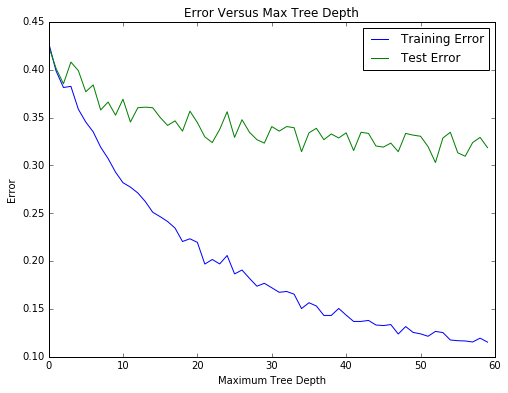

In [16]:
# Plot the data
plt.figure(1, figsize=(8, 6))
plt.plot(max_depth_train_error, label='Training Error')
plt.plot(min_depth_tests_error, label='Test Error')
plt.legend(loc='best')
plt.title('Error Versus Max Tree Depth')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Error')
plt.show()

### Varying Leaf Size

In [13]:
# Set up lists to store training errors and test errors.
min_leaf_train_error = []
min_leaf_tests_error = []

# Train models with different minimum leaf sizes and record
# scores on the models.
minimum_leaf = 1
maximum_leaf = 100
num_trials = 2
for min_leaf_size in range(minimum_leaf, maximum_leaf + 1):
    # Run trials for each minimum leaf size and average the values.
    train_trial_errors = []
    tests_trial_errors = []
    for i in range(0, num_trials):
        clf = RandomForestClassifier(min_samples_leaf=min_leaf_size)
        clf.fit(trainingX, trainingY)
        train_trial_errors.append(1 - clf.score(trainingX, trainingY))
        tests_trial_errors.append(1 - clf.score(testX, testY))
    min_leaf_train_error.append(np.mean(train_trial_errors))
    min_leaf_tests_error.append(np.mean(tests_trial_errors))

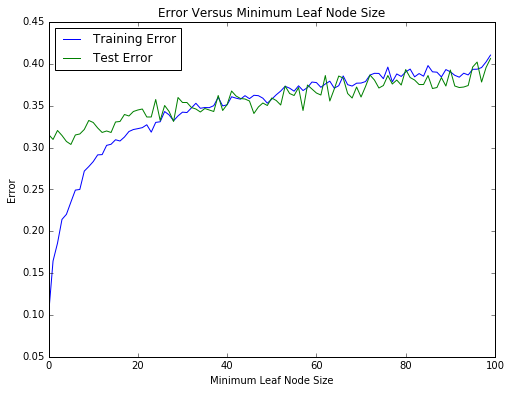

In [14]:
# Plot the data
plt.figure(2, figsize=(8, 6))
plt.plot(min_leaf_train_error, label='Training Error')
plt.plot(min_leaf_tests_error, label='Test Error')
plt.legend(loc='best')
plt.title('Error Versus Minimum Leaf Node Size')
plt.xlabel('Minimum Leaf Node Size')
plt.ylabel('Error')
plt.show()